In [5]:
from PIL import Image, ImageDraw, ImageOps
import math
from pain import gen_valid_cam, gen_valid_tar
import numpy as np
import random
from PIL import ImageTransform
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely import affinity
import matplotlib.pyplot as plt
import os

In [6]:
img = Image.open("target_images/cross,Blue,Q,Yellow.png")
img
bgd_img = Image.open("master_background.png")

In [7]:
cam, intersection, bgd, rot = gen_valid_cam()
print(rot)
print(*cam.exterior.coords)

210
244
pog
244
(6350.0, 2744.0) (4582.487536146438, 6367.93759467824) (1850.1536353969714, 5035.2893084394445) (3617.666099250533, 1411.3517137612037) (6350.0, 2744.0)


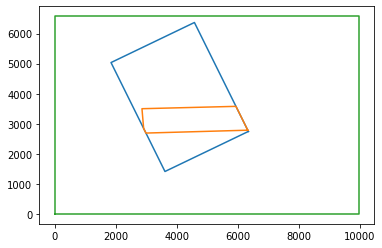

In [8]:

plt.plot(*cam.exterior.xy)
plt.plot(*intersection.exterior.xy)
bgd = Polygon(([0, 0], [bgd_img.width, 0], [bgd_img.width, bgd_img.height], [0, bgd_img.height]))
plt.plot(*bgd.exterior.xy)

test = bgd_img.transform((4032,3040),ImageTransform.QuadTransform(np.ravel(cam.exterior.coords)))
test.show()

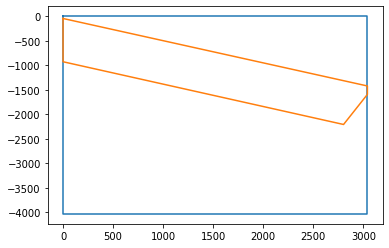

In [9]:
intersection = affinity.translate(intersection,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])
cam = affinity.translate(cam,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])
intersection = affinity.rotate(intersection,rot-90,(0,0))
cam = affinity.rotate(cam,rot-90,(0,0))

# intersection = affinity.translate(intersection,yoff=-1*cam.exterior.coords[1][1])
# cam = affinity.translate(cam,yoff=-1*cam.exterior.coords[1][1])

# cam = affinity.translate(cam,-1*cam.exterior.coords[0][0],-1*cam.exterior.coords[0][1])

plt.plot(*cam.exterior.xy)
plt.plot(*intersection.exterior.xy)
# plt.plot(*bgd.exterior.xy)

5.670633280506207e-13 -2207.6501167088936 3040.0000000000005 -45.765208102801346
193
(2387.0, -189.0) (2361.666378315584, -194.8487274129405) (2369.3147141632753, -227.9773096156385) (2394.648335847691, -222.128582202698) (2387.0, -189.0)
207
(2525.0, -148.0) (2501.8338303711025, -159.80375299322822) (2517.269507362247, -190.0979748156327) (2540.4356769911446, -178.29422182240452) (2525.0, -148.0)
289
(779.0, -411.0) (787.4647720158861, -435.5834829655822) (819.6124035862629, -424.51416571403894) (811.1476315703768, -399.93068274845666) (779.0, -411.0)
219
(389.0, -234.0) (368.79420500211876, -250.36233016729577) (390.19109829781326, -276.78529285683277) (410.3968932956945, -260.42296268953703) (389.0, -234.0)
pog


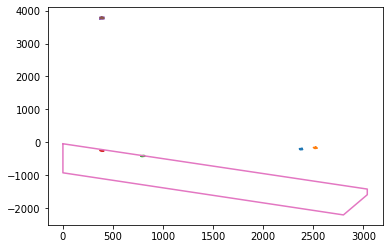

In [11]:
target = Image.open("target_images/cross,Blue,Q,Yellow.png")
tar_poly, rot_box = gen_valid_tar(intersection,target)
# print(gen_valid_tar(intersection,target))
tar_poly = affinity.translate(tar_poly,yoff=4032)
plt.plot(*(tar_poly.envelope).exterior.xy)
plt.plot(*(tar_poly).exterior.xy)
plt.plot(*intersection.exterior.xy)
plt.show()